In [1]:
import pandas as pd
import numpy as np
import re
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

C:\Users\Isabel\AppData\Local\Temp\ipykernel_10936\3789642900.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [123]:
df = pd.read_csv('anime-filtered.csv', index_col=0)

In [124]:
data = df[df['Type'].isin(['TV', 'Movie'])]
data.reset_index(inplace=True)
data.head()

,anime_id,Name,Score,Genres,English name,Japanese name,sypnopsis,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,"In the year 2071, humanity has colonized sever...",TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,"other day, another bounty—such is the life of ...",Movie,1,"Sep 1, 2001",Unknown,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,"Vash the Stampede is the man with a $$60,000,0...",TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),ches are individuals with special powers like ...,TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,Original,25 min. per ep.,PG-13 - Teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,It is the dark century and the people are suff...,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,"TV Tokyo, Dentsu",Unknown,Toei Animation,Manga,23 min. per ep.,PG - Children,3710.0,4369,13224,18,642,7314,766,1108


## funciones


In [86]:
def duraciones(linea):   
    numeros = re.findall(r'\d+', linea)

    numeros_enteros = [int(numero) for numero in numeros]

    if len(numeros_enteros) == 2:
        resultado = float((numeros_enteros[0] + (numeros_enteros[1] / 100)) * 60)
        return resultado
    
    elif len(numeros_enteros) == 1:
        resultado = int(numeros_enteros[0])
        return resultado
    else:
        return np.nan

In [87]:
def rating(valor):
     return valor.replace('-', '').replace('(', '').replace(')', '').replace('  ', ' ').lower().strip().replace('r  17+', 'r17+')
    

In [88]:
def to_date(valor):
    try:
        try:
            fecha = datetime.strptime(valor, "%b %d, %Y").date()
            return fecha
        except:
            fecha = datetime.strptime(valor, "%b, %Y").date()
            return fecha
    except:
        pass

In [89]:
def nuevas_columnas(df, lista_nombres, col_referencia, split_where):
    df[lista_nombres] = df[col_referencia].str.split(split_where, expand=True)
    return df


## limpieza

In [90]:
data.drop(columns='Premiered', inplace=True)

C:\Users\Isabel\AppData\Local\Temp\ipykernel_7216\406375865.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns='Premiered', inplace=True)


In [91]:
data[['premiered', 'ended']] = data['Aired'].str.split(" to ", expand=True)

C:\Users\Isabel\AppData\Local\Temp\ipykernel_7216\2932903381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['premiered', 'ended']] = data['Aired'].str.split(" to ", expand=True)
C:\Users\Isabel\AppData\Local\Temp\ipykernel_7216\2932903381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['premiered', 'ended']] = data['Aired'].str.split(" to ", expand=True)


In [92]:
data['premiered'] = data['premiered'].apply(to_date)

C:\Users\Isabel\AppData\Local\Temp\ipykernel_7216\3151762982.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['premiered'] = data['premiered'].apply(to_date)


In [93]:
data['ended'] = data['ended'].apply(to_date)

C:\Users\Isabel\AppData\Local\Temp\ipykernel_7216\2977030037.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ended'] = data['ended'].apply(to_date)


In [94]:
data['Duration'] = data['Duration'].apply(duraciones)

C:\Users\Isabel\AppData\Local\Temp\ipykernel_7216\3833622731.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Duration'] = data['Duration'].apply(duraciones)


In [95]:
data['Rating'] = data['Rating'].apply(rating)

C:\Users\Isabel\AppData\Local\Temp\ipykernel_7216\1090919564.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Rating'] = data['Rating'].apply(rating)


In [96]:
data.head()

,anime_id,Name,Score,Genres,English name,Japanese name,sypnopsis,Type,Episodes,Aired,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,premiered,ended
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,"In the year 2071, humanity has colonized sever...",TV,26,"Apr 3, 1998 to Apr 24, 1999",Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24.0,r 17+ violence & profanity,28.0,39,1251960,61971,105808,718161,71513,26678,1998-04-03,1999-04-24
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,"other day, another bounty—such is the life of ...",Movie,1,"Sep 1, 2001","Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,93.0,r 17+ violence & profanity,159.0,518,273145,1174,4143,208333,1935,770,2001-09-01,None
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,"Vash the Stampede is the man with a $$60,000,0...",TV,26,"Apr 1, 1998 to Sep 30, 1998",Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24.0,pg13 teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925,1998-04-01,1998-09-30
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),ches are individuals with special powers like ...,TV,26,"Jul 2, 2002 to Dec 24, 2002","TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,Original,25.0,pg13 teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378,2002-07-02,2002-12-24
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,It is the dark century and the people are suff...,TV,52,"Sep 30, 2004 to Sep 29, 2005","TV Tokyo, Dentsu",Unknown,Toei Animation,Manga,23.0,pg children,3710.0,4369,13224,18,642,7314,766,1108,2004-09-30,2005-09-29


In [102]:
def nuevas_columnas(df):
    nuevas_columnas = {columna: columna.lower() for columna in df.columns}
    return df.rename(columns=nuevas_columnas, inplace= True)

# string to lower
def unify(valor):
    try:
        return valor.lower().strip()
    except:
        return valor

def homog_tablas(lista_df):
    for df in lista_df:
        nuevas_columnas(df)
    
    for df in lista_df:
        for columna in df.columns:
            df[columna] = df[columna].apply(unify)

In [98]:
nuevas_columnas(data)

C:\Users\Isabel\AppData\Local\Temp\ipykernel_7216\2036735069.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df.rename(columns=nuevas_columnas, inplace= True)


In [101]:
data.head()

,anime_id,name,score,genres,english name,japanese name,sypnopsis,type,episodes,aired,producers,licensors,studios,source,duration,rating,ranked,popularity,members,favorites,watching,completed,on-hold,dropped,premiered,ended
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,"In the year 2071, humanity has colonized sever...",TV,26,"Apr 3, 1998 to Apr 24, 1999",Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24.0,r 17+ violence & profanity,28.0,39,1251960,61971,105808,718161,71513,26678,1998-04-03,1999-04-24
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,"other day, another bounty—such is the life of ...",Movie,1,"Sep 1, 2001","Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,93.0,r 17+ violence & profanity,159.0,518,273145,1174,4143,208333,1935,770,2001-09-01,None
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,"Vash the Stampede is the man with a $$60,000,0...",TV,26,"Apr 1, 1998 to Sep 30, 1998",Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24.0,pg13 teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925,1998-04-01,1998-09-30
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),ches are individuals with special powers like ...,TV,26,"Jul 2, 2002 to Dec 24, 2002","TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,Original,25.0,pg13 teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378,2002-07-02,2002-12-24
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,It is the dark century and the people are suff...,TV,52,"Sep 30, 2004 to Sep 29, 2005","TV Tokyo, Dentsu",Unknown,Toei Animation,Manga,23.0,pg children,3710.0,4369,13224,18,642,7314,766,1108,2004-09-30,2005-09-29


In [104]:
data.drop(columns=['aired', 'japanese name', 'english name'], inplace=True)
data.head()

C:\Users\Isabel\AppData\Local\Temp\ipykernel_7216\4068549832.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['aired', 'japanese name', 'english name'], inplace=True)


,anime_id,name,score,genres,sypnopsis,type,episodes,producers,licensors,studios,source,duration,rating,ranked,popularity,members,favorites,watching,completed,on-hold,dropped,premiered,ended
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space","In the year 2071, humanity has colonized sever...",TV,26,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24.0,r 17+ violence & profanity,28.0,39,1251960,61971,105808,718161,71513,26678,1998-04-03,1999-04-24
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space","other day, another bounty—such is the life of ...",Movie,1,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,93.0,r 17+ violence & profanity,159.0,518,273145,1174,4143,208333,1935,770,2001-09-01,None
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen","Vash the Stampede is the man with a $$60,000,0...",TV,26,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24.0,pg13 teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925,1998-04-01,1998-09-30
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",ches are individuals with special powers like ...,TV,26,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,Original,25.0,pg13 teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378,2002-07-02,2002-12-24
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",It is the dark century and the people are suff...,TV,52,"TV Tokyo, Dentsu",Unknown,Toei Animation,Manga,23.0,pg children,3710.0,4369,13224,18,642,7314,766,1108,2004-09-30,2005-09-29


In [105]:
data.tail()

,anime_id,name,score,genres,sypnopsis,type,episodes,producers,licensors,studios,source,duration,rating,ranked,popularity,members,favorites,watching,completed,on-hold,dropped,premiered,ended
7281,48471,Tsuki to Laika to Nosferatu,6.51,"Sci-Fi, Space, Vampire",The first astronaut in human history was a vam...,TV,Unknown,Bandai Namco Arts,Unknown,Arvo Animation,Light novel,NaN,unknown,NaN,17564,1857,6,0,0,1,0,None,None
7282,48483,Mieruko-chan,6.51,"Comedy, Horror, Supernatural",ko is a typical high school student whose life...,TV,Unknown,Kadokawa,Unknown,Passione,Manga,NaN,unknown,NaN,17562,7010,70,14,0,14,0,None,None
7283,48488,Higurashi no Naku Koro ni Sotsu,6.51,"Mystery, Dementia, Horror, Psychological, Supe...",Sequel to Higurashi no Naku Koro ni Gou .,TV,Unknown,Unknown,Unknown,Unknown,Visual novel,NaN,r 17+ violence & profanity,NaN,17558,11309,48,3,0,0,0,2021-07-01,None
7284,48491,Yama no Susume: Next Summit,6.51,"Adventure, Slice of Life, Comedy",New Yama no Susume anime.,TV,Unknown,Kadokawa,Unknown,8bit,Manga,NaN,pg13 teens 13 or older,NaN,17565,1386,2,13,2,2,1,None,None
7285,48492,Scarlet Nexus,6.51,"Action, Fantasy",Solar calendar year 2020: grotesque organisms ...,TV,Unknown,Bandai Namco Arts,Unknown,Sunrise,Game,NaN,unknown,NaN,17563,310,0,4,0,1,1,2021-07-01,None


In [106]:
df.tail()

,Name,Score,Genres,English name,Japanese name,sypnopsis,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped
anime_id,,,,,,,,,,,,,,,,,,,,,,,,
48481,Daomu Biji Zhi Qinling Shen Shu,6.51,"Adventure, Mystery, Supernatural",Unknown,盗墓笔记之秦岭神树,No synopsis information has been added to this...,ONA,Unknown,"Apr 4, 2021 to ?",Unknown,Unknown,Unknown,Unknown,Novel,Unknown,Unknown,NaN,13116,354,6,0,0,0,0
48483,Mieruko-chan,6.51,"Comedy, Horror, Supernatural",Unknown,見える子ちゃん,ko is a typical high school student whose life...,TV,Unknown,2021 to ?,Unknown,Kadokawa,Unknown,Passione,Manga,Unknown,Unknown,NaN,17562,7010,70,14,0,14,0
48488,Higurashi no Naku Koro ni Sotsu,6.51,"Mystery, Dementia, Horror, Psychological, Supe...",Higurashi:When They Cry – SOTSU,ひぐらしのなく頃に卒,Sequel to Higurashi no Naku Koro ni Gou .,TV,Unknown,"Jul, 2021 to ?",Summer 2021,Unknown,Unknown,Unknown,Visual novel,Unknown,R - 17+ (violence & profanity),NaN,17558,11309,48,3,0,0,0
48491,Yama no Susume: Next Summit,6.51,"Adventure, Slice of Life, Comedy",Unknown,ヤマノススメ Next Summit,New Yama no Susume anime.,TV,Unknown,Unknown,Unknown,Kadokawa,Unknown,8bit,Manga,Unknown,PG-13 - Teens 13 or older,NaN,17565,1386,2,13,2,2,1
48492,Scarlet Nexus,6.51,"Action, Fantasy",Unknown,SCARLET NEXUS,Solar calendar year 2020: grotesque organisms ...,TV,Unknown,"Jul, 2021 to ?",Summer 2021,Bandai Namco Arts,Unknown,Sunrise,Game,Unknown,Unknown,NaN,17563,310,0,4,0,1,1


In [133]:
df2 = pd.read_csv('../anime-dataset-2023.csv')

In [108]:
df2.tail()

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,Premiered,Status,Producers,Licensors,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
24900,55731,Wu Nao Monu,UNKNOWN,无脑魔女,UNKNOWN,"Comedy, Fantasy, Slice of Life",No description available for this anime.,ONA,15.0,"Jul 4, 2023 to ?",UNKNOWN,Not yet aired,UNKNOWN,UNKNOWN,UNKNOWN,Web manga,Unknown,PG-13 - Teens 13 or older,UNKNOWN,24723,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1386/...
24901,55732,Bu Xing Si: Yuan Qi,Blader Soul,捕星司·源起,UNKNOWN,"Action, Adventure, Fantasy",No description available for this anime.,ONA,18.0,"Jul 27, 2023 to ?",UNKNOWN,Not yet aired,UNKNOWN,UNKNOWN,UNKNOWN,Web novel,Unknown,PG-13 - Teens 13 or older,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1383/...
24902,55733,Di Yi Xulie,The First Order,第一序列,UNKNOWN,"Action, Adventure, Fantasy, Sci-Fi",No description available for this anime.,ONA,16.0,"Jul 19, 2023 to ?",UNKNOWN,Finished Airing,UNKNOWN,UNKNOWN,UNKNOWN,Web novel,Unknown,PG-13 - Teens 13 or older,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1130/...
24903,55734,Bokura no Saishuu Sensou,UNKNOWN,僕らの最終戦争,UNKNOWN,UNKNOWN,A music video for the song Bokura no Saishuu S...,Music,1.0,"Apr 23, 2022",UNKNOWN,Finished Airing,UNKNOWN,UNKNOWN,UNKNOWN,Original,3 min,PG-13 - Teens 13 or older,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1931/...
24904,55735,Shijuuku Nichi,UNKNOWN,四十九日,UNKNOWN,UNKNOWN,A music video for the song Shijuuku Nichi by S...,Music,1.0,"Sep 5, 2022",UNKNOWN,Finished Airing,UNKNOWN,UNKNOWN,UNKNOWN,Original,3 min,PG-13 - Teens 13 or older,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1902/...


In [118]:
df2[['premiered', 'ended']] = df2['Aired'].str.split(" to ", expand=True)
df2.head(2)

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,Premiered,Status,Producers,Licensors,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL,premiered,ended
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",spring 1998,Finished Airing,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...,"Apr 3, 1998","Apr 24, 1999"
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",UNKNOWN,Finished Airing,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,https://cdn.myanimelist.net/images/anime/1439/...,"Sep 1, 2001",None


In [119]:
for col in ['premiered', 'ended']:
    df2[col] = df2[col].apply(to_date)

In [121]:
df2.head()

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,Premiered,Status,Producers,Licensors,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL,premiered,ended
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",spring 1998,Finished Airing,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...,1998-04-03,1999-04-24
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",UNKNOWN,Finished Airing,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,https://cdn.myanimelist.net/images/anime/1439/...,2001-09-01,None
2,6,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",spring 1998,Finished Airing,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...,1998-04-01,1998-09-30
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002",summer 2002,Finished Airing,"Bandai Visual, Dentsu, Victor Entertainment, T...","Funimation, Bandai Entertainment",Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931,https://cdn.myanimelist.net/images/anime/10/19...,2002-07-03,2002-12-25
4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",fall 2004,Finished Airing,"TV Tokyo, Dentsu",Illumitoon Entertainment,Toei Animation,Manga,23 min per ep,PG - Children,4240.0,5126,14,6413.0,15001,https://cdn.myanimelist.net/images/anime/7/215...,2004-09-30,2005-09-29


In [122]:
for v in df2['Premiered']:
    if '2023' in v:
        print(v)

fall 2023
winter 2023
fall 2023
winter 2023
fall 2023
winter 2023
spring 2023
spring 2023
spring 2023
winter 2023
winter 2023
spring 2023
summer 2023
spring 2023
winter 2023
winter 2023
winter 2023
winter 2023
winter 2023
fall 2023
winter 2023
summer 2023
summer 2023
winter 2023
spring 2023
winter 2023
spring 2023
winter 2023
winter 2023
spring 2023
winter 2023
winter 2023
spring 2023
winter 2023
summer 2023
fall 2023
winter 2023
winter 2023
summer 2023
winter 2023
fall 2023
winter 2023
spring 2023
winter 2023
winter 2023
spring 2023
winter 2023
summer 2023
spring 2023
summer 2023
winter 2023
spring 2023
summer 2023
spring 2023
winter 2023
winter 2023
fall 2023
spring 2023
summer 2023
winter 2023
winter 2023
summer 2023
spring 2023
summer 2023
winter 2023
spring 2023
spring 2023
winter 2023
spring 2023
spring 2023
spring 2023
winter 2023
summer 2023
fall 2023
winter 2023
spring 2023
summer 2023
winter 2023
fall 2023
spring 2023
spring 2023
summer 2023
spring 2023
summer 2023
spring 202

# EMPEZAMOS DE NUEVO

In [129]:
df2.columns

Index(['anime_id', 'Name', 'English name', 'Other name', 'Score', 'Genres',
       'Synopsis', 'Type', 'Episodes', 'Aired', 'Premiered', 'Status',
       'Producers', 'Licensors', 'Studios', 'Source', 'Duration', 'Rating',
       'Rank', 'Popularity', 'Favorites', 'Scored By', 'Members', 'Image URL',
       'premiered', 'ended'],
      dtype='object')

In [135]:
df2.drop(columns=['Other name', 'English name','Episodes', 'Aired','Image URL',
       
       'Synopsis',
       'Producers', 'Licensors'], inplace=True)

In [138]:
df2 = df2[df2['Type'].isin(['TV', 'Movie'])]

In [141]:
df2.drop(columns='Duration', inplace=True)

C:\Users\Isabel\AppData\Local\Temp\ipykernel_7216\4150787938.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(columns='Duration', inplace=True)


In [143]:
df2.shape

(11978, 15)

In [142]:
df2.head()

,anime_id,Name,Score,Genres,Type,Premiered,Status,Studios,Source,Rating,Rank,Popularity,Favorites,Scored By,Members
0,1,Cowboy Bebop,8.75,"Action, Award Winning, Sci-Fi",TV,spring 1998,Finished Airing,Sunrise,Original,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505
1,5,Cowboy Bebop: Tengoku no Tobira,8.38,"Action, Sci-Fi",Movie,UNKNOWN,Finished Airing,Bones,Original,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978
2,6,Trigun,8.22,"Action, Adventure, Sci-Fi",TV,spring 1998,Finished Airing,Madhouse,Manga,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252
3,7,Witch Hunter Robin,7.25,"Action, Drama, Mystery, Supernatural",TV,summer 2002,Finished Airing,Sunrise,Original,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931
4,8,Bouken Ou Beet,6.94,"Adventure, Fantasy, Supernatural",TV,fall 2004,Finished Airing,Toei Animation,Manga,PG - Children,4240.0,5126,14,6413.0,15001


In [159]:
def anio_estreno(valor):
    try:
        patron = r'\d{4}'
        resultado = re.search(patron, valor)
        anio = resultado.group()
        return anio
    except:
        return np.nan

In [160]:
df2['Year'] = df2['Premiered'].apply(anio_estreno)

df2.head()

C:\Users\Isabel\AppData\Local\Temp\ipykernel_7216\1441245482.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Year'] = df2['Premiered'].apply(anio_estreno)


,anime_id,Name,Score,Genres,Type,Premiered,Status,Studios,Source,Rating,Rank,Popularity,Favorites,Scored By,Members,Year
0,1,Cowboy Bebop,8.75,"Action, Award Winning, Sci-Fi",TV,spring 1998,Finished Airing,Sunrise,Original,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,1998
1,5,Cowboy Bebop: Tengoku no Tobira,8.38,"Action, Sci-Fi",Movie,UNKNOWN,Finished Airing,Bones,Original,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,NaN
2,6,Trigun,8.22,"Action, Adventure, Sci-Fi",TV,spring 1998,Finished Airing,Madhouse,Manga,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,1998
3,7,Witch Hunter Robin,7.25,"Action, Drama, Mystery, Supernatural",TV,summer 2002,Finished Airing,Sunrise,Original,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931,2002
4,8,Bouken Ou Beet,6.94,"Adventure, Fantasy, Supernatural",TV,fall 2004,Finished Airing,Toei Animation,Manga,PG - Children,4240.0,5126,14,6413.0,15001,2004


In [167]:
df_test = df2[df2['Year'].isin(['2018', '2019', '2020', '2021', '2022', '2023'])]

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, '2018'),
  Text(1, 0, '2019'),
  Text(2, 0, '2020'),
  Text(3, 0, '2021'),
  Text(4, 0, '2022'),
  Text(5, 0, '2023')])

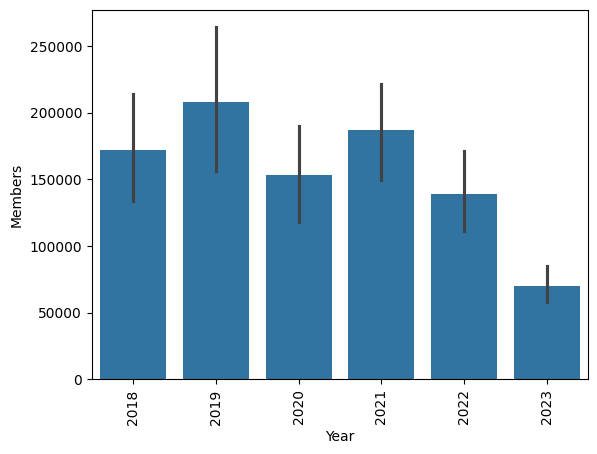

In [170]:
sns.barplot(x='Year', y='Members', data=df_test, order=['2018', '2019', '2020', '2021', '2022', '2023'])
plt.xticks(rotation=90)

In [173]:
ratings = list(df_test['Rating'].unique())

ratings

['PG-13 - Teens 13 or older',
 'R - 17+ (violence & profanity)',
 'PG - Children',
 'G - All Ages',
 'R+ - Mild Nudity',
 'UNKNOWN']

In [193]:
df_test['Members']

8522     246937
10511     50891
10523    830136
10897     81788
10940    118973
          ...  
24482       149
24515        32
24829     37078
24841        55
24842        41
Name: Members, Length: 1337, dtype: int64

Text(0.5, 1.0, 'Interacción de los usuarios con animes según Rating')

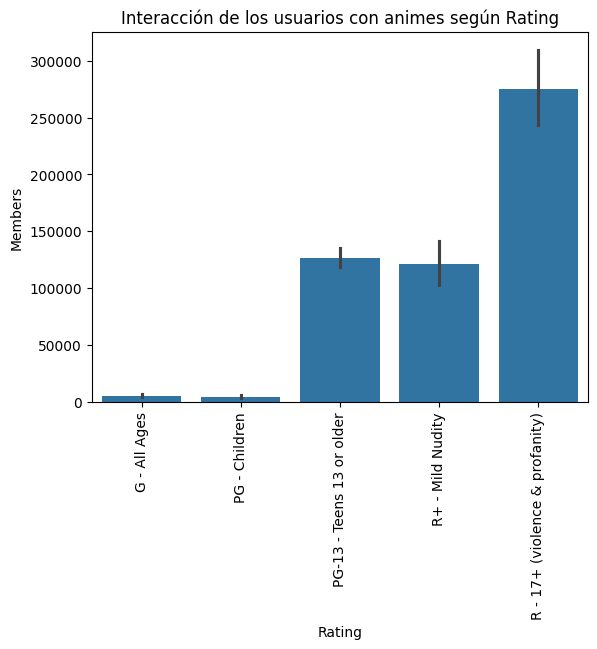

In [196]:
sns.barplot(x='Rating', y='Members', data=df2, order=['G - All Ages', 'PG - Children', 'PG-13 - Teens 13 or older', 'R+ - Mild Nudity', 'R - 17+ (violence & profanity)'])
plt.xticks(rotation=90)
plt.title('Interacción de los usuarios con animes según Rating')

Text(0.5, 1.0, 'Interacción de los usuarios con animes según Rating')

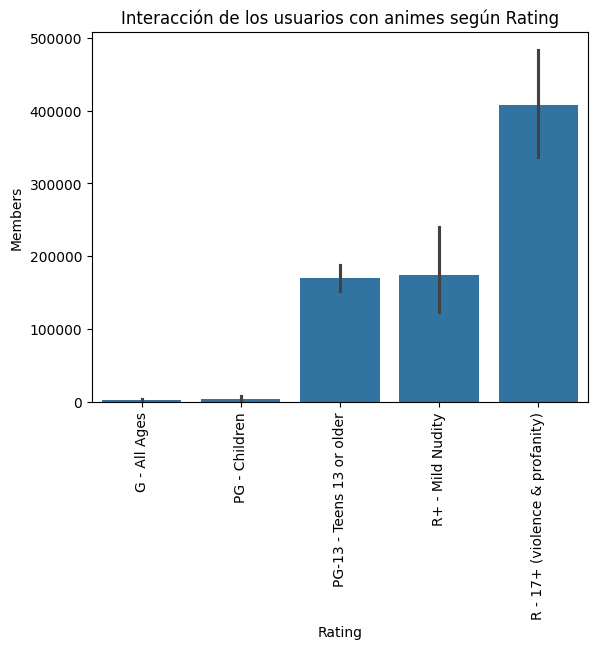

In [195]:
sns.barplot(x='Rating', y='Members', data=df_test, order=['G - All Ages', 'PG - Children', 'PG-13 - Teens 13 or older', 'R+ - Mild Nudity', 'R - 17+ (violence & profanity)'])
plt.xticks(rotation=90)
plt.title('Interacción de los usuarios con animes según Rating')

Text(0.5, 1.0, 'Interacción de usuarios con animes estrenados entre 2018 y 2023')

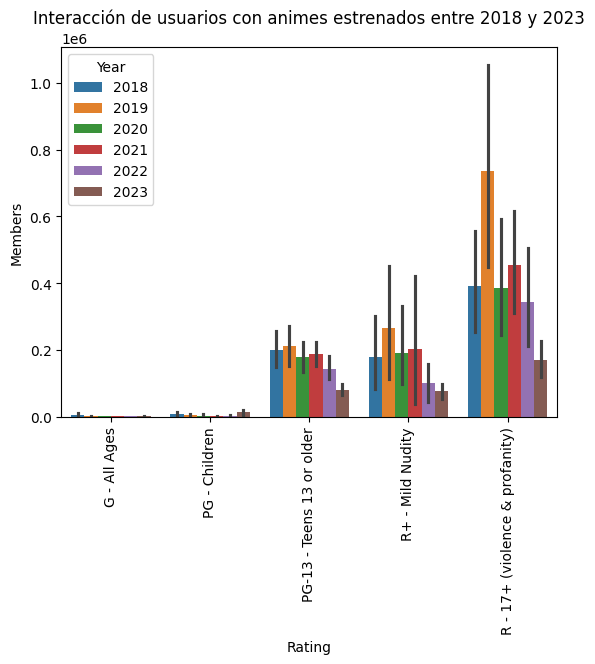

In [182]:
sns.barplot(x='Rating', y='Members', hue='Year', data=df_test, order=['G - All Ages', 'PG - Children', 'PG-13 - Teens 13 or older', 'R+ - Mild Nudity', 'R - 17+ (violence & profanity)'], hue_order=['2018', '2019', '2020', '2021', '2022', '2023'])
plt.xticks(rotation=90)
plt.title('Interacción de usuarios con animes estrenados entre 2018 y 2023')

In [188]:
df_test.groupby('Studios')['Rating'].count()

Studios
10Gauge               1
2:10 AM Animation     1
33 Collective         1
8bit                 12
A-1 Pictures         20
                     ..
feel., Gaina          1
helo.inc              1
production doA        1
studio MOTHER         1
ufotable              4
Name: Rating, Length: 325, dtype: int64

In [189]:
df_test['Studios'].unique()

array(['J.C.Staff', 'ENGI', 'White Fox', 'Production I.G',
       'CygamesPictures', 'Xebec', 'David Production',
       'Hoods Entertainment', 'Satelight', 'feel.', 'Shaft',
       'Kyoto Animation', 'Madhouse', 'OLM', 'Zero-G',
       'Seven Arcs Pictures', 'TROYCA', 'Project No.9',
       'TMS Entertainment', 'A-1 Pictures', 'Passione', 'Fukushima Gaina',
       'LIDENFILMS', 'SILVER LINK., Connect', 'J.C.Staff, Egg Firm',
       'C-Station', 'Pierrot', 'Doga Kobo', 'Wit Studio', 'SILVER LINK.',
       'Studio Deen', "Brain's Base", 'P.A. Works',
       "Children's Playground Entertainment", 'Studio Gokumi, AXsiZ',
       'Tomason', 'Kamikaze Douga', 'A-Real', 'Kinema Citrus',
       'CloverWorks', 'Studio Gokumi', 'Toei Animation', '8bit', 'Nexus',
       'Emon, Blade', 'Diomedéa', 'NAZ', 'Geek Toys', 'Trigger',
       'A-1 Pictures, Trigger, CloverWorks', 'Telecom Animation Film',
       'Shin-Ei Animation', 'Platinum Vision',
       'A-1 Pictures, Bridge, CloverWorks', 'C2C', 'St

In [192]:
df_test.groupby('Studios')['Members'].count()

Studios
10Gauge               1
2:10 AM Animation     1
33 Collective         1
8bit                 12
A-1 Pictures         20
                     ..
feel., Gaina          1
helo.inc              1
production doA        1
studio MOTHER         1
ufotable              4
Name: Members, Length: 325, dtype: int64

## datos scrapeados



In [2]:
datos = pd.read_csv('data.csv', index_col=0)

In [3]:
datos.head()

,Anime,Score,Members,Year,season
0,Kono Subarashii Sekai ni Shukufuku wo! 3,8.55,306K,2018,autumn
1,Kimetsu no Yaiba: Hashira Geiko-hen,NaN,253K,2018,autumn
2,Tensei shitara Slime Datta Ken 3rd Season,8.41,235K,2018,autumn
3,Mushoku Tensei II: Isekai Ittara Honki Dasu Pa...,8.37,225K,2018,autumn
4,Boku no Hero Academia 7th Season,NaN,182K,2018,autumn


In [4]:
ref_datos = pd.read_csv('../anime-dataset-2023.csv', index_col=0)

In [5]:
ref_datos.columns

Index(['Name', 'English name', 'Other name', 'Score', 'Genres', 'Synopsis',
       'Type', 'Episodes', 'Aired', 'Premiered', 'Status', 'Producers',
       'Licensors', 'Studios', 'Source', 'Duration', 'Rating', 'Rank',
       'Popularity', 'Favorites', 'Scored By', 'Members', 'Image URL'],
      dtype='object')

In [7]:
for v in ref_datos['Name']:
    if 'wo!' in v:
        print(v)

Mamoru-kun ni Megami no Shukufuku wo!
Pokemon: Mewtwo! Ware wa Koko ni Ari
Dragon Ball Kai: Mirai ni Heiwa wo! Goku no Tamashii yo Eien ni
Itsumo Kokoro ni Taiyou wo!
Kono Subarashii Sekai ni Shukufuku wo!
Kono Subarashii Sekai ni Shukufuku wo! Kono Subarashii Choker ni Shukufuku wo!
Kono Subarashii Sekai ni Shukufuku wo! 2
Kono Subarashii Sekai ni Shukufuku wo! 2: Kono Subarashii Geijutsu ni Shukufuku wo!
Kono Subarashii Sekai ni Shukufuku wo! Movie: Kurenai Densetsu
Kono Subarashii Sekai ni Shukufuku wo! 3
Kono Subarashii Sekai ni Bakuen wo!


In [8]:
df_merged = pd.merge(datos, ref_datos, left_on='Anime', right_on='Name', how='left')

In [10]:
datos.shape

(214, 5)

In [11]:
df_merged.shape

(214, 28)

In [9]:
df_merged

,Anime,Score_x,Members_x,Year,season,Name,English name,Other name,Score_y,Genres,Synopsis,Type,Episodes,Aired,Premiered,Status,Producers,Licensors,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members_y,Image URL
0,Kono Subarashii Sekai ni Shukufuku wo! 3,8.55,306K,2018,autumn,Kono Subarashii Sekai ni Shukufuku wo! 3,KonoSuba: God's Blessing on This Wonderful Wor...,この素晴らしい世界に祝福を！3,UNKNOWN,"Adventure, Comedy, Fantasy",Third season of Kono Subarashii Sekai ni Shuku...,TV,UNKNOWN,Not available,UNKNOWN,Not yet aired,Kadokawa,UNKNOWN,Drive,Light novel,Unknown,PG-13 - Teens 13 or older,UNKNOWN,1204.0,1618.0,UNKNOWN,183954.0,https://cdn.myanimelist.net/images/anime/1800/...
1,Kimetsu no Yaiba: Hashira Geiko-hen,NaN,253K,2018,autumn,Kimetsu no Yaiba: Hashira Geiko-hen,Demon Slayer: Kimetsu no Yaiba Hashira Trainin...,鬼滅の刃 柱稽古編,UNKNOWN,"Action, Fantasy",Hashira Training Arc of Kimetsu no Yaiba,TV,UNKNOWN,Not available,UNKNOWN,Not yet aired,UNKNOWN,UNKNOWN,ufotable,Manga,Unknown,R - 17+ (violence & profanity),UNKNOWN,2851.0,186.0,UNKNOWN,51554.0,https://cdn.myanimelist.net/images/anime/1230/...
2,Tensei shitara Slime Datta Ken 3rd Season,8.41,235K,2018,autumn,Tensei shitara Slime Datta Ken 3rd Season,That Time I Got Reincarnated as a Slime Season 3,転生したらスライムだった件,UNKNOWN,"Action, Adventure, Comedy, Fantasy",Third season of Tensei shitara Slime Datta Ken.,TV,UNKNOWN,Apr 2024 to ?,spring 2024,Not yet aired,Kodansha,UNKNOWN,UNKNOWN,Manga,Unknown,PG-13 - Teens 13 or older,UNKNOWN,1847.0,779.0,UNKNOWN,107601.0,https://cdn.myanimelist.net/images/anime/1766/...
3,Mushoku Tensei II: Isekai Ittara Honki Dasu Pa...,8.37,225K,2018,autumn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Boku no Hero Academia 7th Season,NaN,182K,2018,autumn,Boku no Hero Academia 7th Season,My Hero Academia Season 7,僕のヒーローアカデミア,UNKNOWN,Action,7th season of Boku no Hero Academia,TV,UNKNOWN,Not available,UNKNOWN,Not yet aired,Shueisha,UNKNOWN,UNKNOWN,Manga,Unknown,PG-13 - Teens 13 or older,UNKNOWN,2212.0,230.0,UNKNOWN,80878.0,https://cdn.myanimelist.net/images/anime/1954/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,Otonari no Tenshi-sama ni Itsunomanika Dame Ni...,7.82,305K,2023,winter,Otonari no Tenshi-sama ni Itsunomanika Dame Ni...,The Angel Next Door Spoils Me Rotten,お隣の天使様にいつの間にか駄目人間にされていた件,7.83,"Comedy, Romance","Mahiru Shiina is worthy of her nickname ""Angel...",TV,12.0,"Jan 7, 2023 to Mar 25, 2023",winter 2023,Finished Airing,"Pony Canyon, Movic, TOHO animation, Tokyo MX, ...",UNKNOWN,Project No.9,Light novel,23 min per ep,PG-13 - Teens 13 or older,864.0,942.0,3687.0,115879.0,237365.0,https://cdn.myanimelist.net/images/anime/1240/...
210,Bungou Stray Dogs 4th Season,8.45,284K,2023,winter,Bungou Stray Dogs 4th Season,Bungo Stray Dogs 4,文豪ストレイドッグス,8.46,"Action, Mystery, Supernatural","No longer concerned with military affairs, Yuk...",TV,13.0,"Jan 4, 2023 to Mar 29, 2023",winter 2023,Finished Airing,"WOWOW, Lantis, Movic, Glovision, Crunchyroll, ...",UNKNOWN,Bones,Manga,23 min per ep,R - 17+ (violence & profanity),140.0,987.0,2751.0,65491.0,226801.0,https://cdn.myanimelist.net/images/anime/1263/...
211,"Ijiranaide, Nagatoro-san 2nd Attack",7.49,278K,2023,winter,"Ijiranaide, Nagatoro-san 2nd Attack","Don't Toy with Me, Miss Nagatoro 2nd Attack",イジらないで、長瀞さん 2nd Attack,7.52,Comedy,Hayase Nagatoro and Naoto Hachiouji have grown...,TV,12.0,"Jan 8, 2023 to Mar 26, 2023",winter 2023,Finished Airing,"TMS Entertainment, Mainichi Broadcasting Syste...",UNKNOWN,OLM,Web manga,23 min per ep,PG-13 - Teens 13 or older,1658.0,923.0,1826.0,84429.0,243024.0,https://cdn.myanimelist.net/images/anime/1902/...
212,NieR:Automata Ver1.1a,7.51,274K,2023,winter,NieR:Automata Ver1.1a,UNKNOWN,NieR:Automata Ver1.1a,7.41,"Action, Fantasy, Sci-Fi",In a post-apocalyptic world overrun by alien-c...,TV,UNKNOWN,"Jan 8, 2023 to ?",winter 2023,Currently Ai

In [12]:
df_merged.columns

Index(['Anime', 'Score_x', 'Members_x', 'Year', 'season', 'Name',
       'English name', 'Other name', 'Score_y', 'Genres', 'Synopsis', 'Type',
       'Episodes', 'Aired', 'Premiered', 'Status', 'Producers', 'Licensors',
       'Studios', 'Source', 'Duration', 'Rating', 'Rank', 'Popularity',
       'Favorites', 'Scored By', 'Members_y', 'Image URL'],
      dtype='object')

In [13]:
df = df_merged[['Anime', 'Score_x', 'Score_y', 'Members_x', 'Year', 'season', 'Rating']]
df

,Anime,Score_x,Score_y,Members_x,Year,season,Rating
0,Kono Subarashii Sekai ni Shukufuku wo! 3,8.55,UNKNOWN,306K,2018,autumn,PG-13 - Teens 13 or older
1,Kimetsu no Yaiba: Hashira Geiko-hen,NaN,UNKNOWN,253K,2018,autumn,R - 17+ (violence & profanity)
2,Tensei shitara Slime Datta Ken 3rd Season,8.41,UNKNOWN,235K,2018,autumn,PG-13 - Teens 13 or older
3,Mushoku Tensei II: Isekai Ittara Honki Dasu Pa...,8.37,NaN,225K,2018,autumn,NaN
4,Boku no Hero Academia 7th Season,NaN,UNKNOWN,182K,2018,autumn,PG-13 - Teens 13 or older
...,...,...,...,...,...,...,...
209,Otonari no Tenshi-sama ni Itsunomanika Dame Ni...,7.82,7.83,305K,2023,winter,PG-13 - Teens 13 or older
210,Bungou Stray Dogs 4th Season,8.45,8.46,284K,2023,winter,R - 17+ (violence & profanity)
211,"Ijiranaide, Nagatoro-san 2nd Attack",7.49,7.52,278K,2023,winter,PG-13 - Teens 13 or older
212,NieR:Automata Ver1.1a,7.51,7.41,274K,2023,winter,PG-13 - Teens 13 or older


In [31]:
df

,Anime,Score,Members,Year,season,Rating
0,Kono Subarashii Sekai ni Shukufuku wo! 3,8.55,306K,2018,autumn,PG-13 - Teens 13 or older
2,Tensei shitara Slime Datta Ken 3rd Season,8.41,235K,2018,autumn,PG-13 - Teens 13 or older
3,Mushoku Tensei II: Isekai Ittara Honki Dasu Pa...,8.37,225K,2018,autumn,NaN
5,Kaijuu 8-gou,8.21,144K,2018,autumn,UNKNOWN
6,Maou Gakuin no Futekigousha II: Shijou Saikyou...,7.59,122K,2018,autumn,NaN
...,...,...,...,...,...,...
209,Otonari no Tenshi-sama ni Itsunomanika Dame Ni...,7.82,305K,2023,winter,PG-13 - Teens 13 or older
210,Bungou Stray Dogs 4th Season,8.45,284K,2023,winter,R - 17+ (violence & profanity)
211,"Ijiranaide, Nagatoro-san 2nd Attack",7.49,278K,2023,winter,PG-13 - Teens 13 or older
212,NieR:Automata Ver1.1a,7.51,274K,2023,winter,PG-13 - Teens 13 or older
